# Cleaning and Merging Lyrics and Song Attribute Datasets

## Cleaning up Lyrics Dataset

The original dataset had 5 millon songs, but many were not in English. In another notebook I filtered the dataframe to just have songs in English, partially to make the size of the dataset easier to process and partially because text processing is only possible with English words. Here I am importing the csv of the songs that are in English, deleting extra columns, and making the artist lowercase so it is easier to merge with the Spotify dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("english_lyrics.csv", index_col="Unnamed: 0")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3374198 entries, 0 to 5134855
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   title          object
 1   tag            object
 2   artist         object
 3   year           int64 
 4   views          int64 
 5   features       object
 6   lyrics         object
 7   id             int64 
 8   language_cld3  object
 9   language_ft    object
 10  language       object
dtypes: int64(3), object(8)
memory usage: 308.9+ MB


In [4]:
df.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [5]:
df['artist'] = df['artist'].astype("string").str.lower()

Since all songs are now in English, I can drop the extra columns about language, the ID number, and the "features" column since I will not be using it.

In [6]:
lyrics_df = df[['title', 'artist', 'tag', 'year', 'lyrics']]

In [7]:
lyrics_df.head()

,title,artist,tag,year,lyrics
0,Killa Cam,cam'ron,rap,2004,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki..."
1,Can I Live,jay-z,rap,1996,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,..."
2,Forgive Me Father,fabolous,rap,2003,Maybe cause I'm eatin\nAnd these bastards fien...
3,Down and Out,cam'ron,rap,2004,[Produced by Kanye West and Brian Miller]\n\n[...
4,Fly In,lil wayne,rap,2005,"[Intro]\nSo they ask me\n""Young boy\nWhat you ..."


## Cleaning Up Spotify Dataset

The Spotify playlist has 1.2 million songs with 24 columns. I will import the dataset as a dataframe, change some variable types from object to string, remove extra artists from the artists column, and make the artists lower case to match up with the other dataset.

In [8]:
spotify_df = pd.read_csv("tracks_features.csv")

In [9]:
spotify_df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [11]:
spotify_df['name'] = spotify_df['name'].astype("string")
spotify_df['artists'] = spotify_df['artists'].astype("string")
spotify_df['album'] = spotify_df['album'].astype("string")

In the artists column there are multiple artists, so I split it on the comma and just kept the first entry in the artists list. I also removed the extra punctuation before and after the artist name.

In [12]:
spotify_df['artists'] = spotify_df['artists'].str.split(',').str[0]

In [13]:
spotify_df['artists'] = spotify_df['artists'].str.replace(r"[\[\]']", '', regex=True)

In [14]:
spotify_df['artists'] = spotify_df['artists'].astype("string").str.lower()

## Merging Datasets

I'm merging on the song title, artist, and year released. I tried before on just the title and year, but it was matching incorrectly. As showed above, I changed both the artist columns to lowercase so I could match them more easily. The Spotify dataset also sometimes had more than one artist in the artists column, so I just kept the first artist in the list and merged on that.

In [16]:
merged_df = pd.merge(lyrics_df, spotify_df, left_on=['title', 'artist', 'year'], right_on=['name', 'artists', 'year'])

In [19]:
merged_df['year'].value_counts()

2020    11959
2019    10590
2018     7733
2017     5844
2016     4506
        ...  
1939        4
1951        2
1917        1
1943        1
1925        1
Name: year, Length: 73, dtype: int64

<AxesSubplot: >

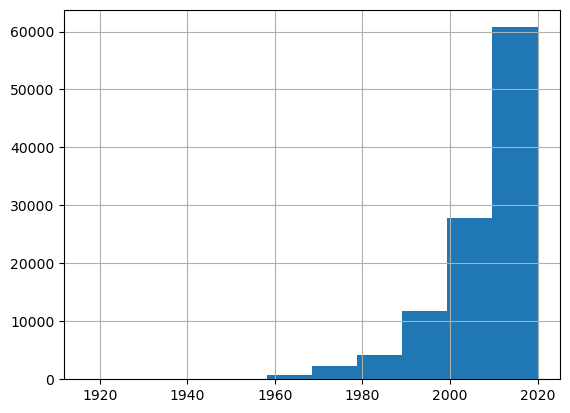

In [20]:
merged_df['year'].hist()

Since the majority of the songs are between 2000 and 2020, I might just look at those two decades separately. First I'll add a column for the decade and see the actual counts.

In [21]:
merged_df['year string'] = merged_df['year'].astype(str)

In [22]:
year_stem = [
    merged_df['year string'].str.startswith('191'),
    merged_df['year string'].str.startswith('192'),
    merged_df['year string'].str.startswith('193'),
    merged_df['year string'].str.startswith('194'),
    merged_df['year string'].str.startswith('195'),
    merged_df['year string'].str.startswith('196'),
    merged_df['year string'].str.startswith('197'),
    merged_df['year string'].str.startswith('198'),
    merged_df['year string'].str.startswith('199'),
    merged_df['year string'].str.startswith('200'),
    merged_df['year string'].str.startswith('201'),
    merged_df['year string'].str.startswith('202')
]

In [23]:
labels = ['1910s', '1920s', '1930s','1940s', '1950s', '1960s', '1970s', '1980s', '1990s', 
          '2000s', '2010s', '2020']

In [24]:
merged_df['decade'] = np.select(year_stem, labels, default='other')

In [26]:
merged_df['decade'].value_counts()

2010s    48776
2000s    27811
2020     11959
1990s    11719
1980s     3876
1970s     2461
1960s      975
1950s      114
1930s        8
1910s        1
1940s        1
1920s        1
Name: decade, dtype: int64

Since there are so few songs in the older decades, I'm going to drop everything in the 1960s or earlier.

In [28]:
df_7020 = merged_df[~merged_df['decade'].isin(['1910s', '1920s', '1930s', '1940s', '1950s', '1960s'])]

In [29]:
df_7020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106602 entries, 0 to 107701
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             106602 non-null  object 
 1   artist            106602 non-null  string 
 2   tag               106602 non-null  object 
 3   year              106602 non-null  int64  
 4   lyrics            106602 non-null  object 
 5   id                106602 non-null  object 
 6   name              106602 non-null  string 
 7   album             106602 non-null  string 
 8   album_id          106602 non-null  object 
 9   artists           106602 non-null  string 
 10  artist_ids        106602 non-null  object 
 11  track_number      106602 non-null  int64  
 12  disc_number       106602 non-null  int64  
 13  explicit          106602 non-null  bool   
 14  danceability      106602 non-null  float64
 15  energy            106602 non-null  float64
 16  key               10

In [30]:
df_7020.reset_index(drop=True, inplace=True)

I will drop some of the other extra columns that I do not anticipate using in the machine learning models in the next phase of this project.

In [32]:
df_keep = df_7020.drop(columns=['id', 'album_id', 'artist_ids', 'track_number', 
                                'disc_number', 'release_date', 'year string', 'name', 'artists'])

In [33]:
df_keep['title'] = df_keep['title'].astype("string")
df_keep['artist'] = df_keep['artist'].astype("string")
df_keep['lyrics'] = df_keep['lyrics'].astype("string")

I will clean the lyrics more extensively in the next phase, but I noticed that there are many extra sections of explanatory text in the lyrics that are between square brackets. I am going ahead and removing this text now.

In [34]:
df_keep['lyrics'] = df_keep['lyrics'].str.replace(r'\[.*?\]', '', regex=True)

In [35]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106602 entries, 0 to 106601
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             106602 non-null  string 
 1   artist            106602 non-null  string 
 2   tag               106602 non-null  object 
 3   year              106602 non-null  int64  
 4   lyrics            106602 non-null  string 
 5   album             106602 non-null  string 
 6   explicit          106602 non-null  bool   
 7   danceability      106602 non-null  float64
 8   energy            106602 non-null  float64
 9   key               106602 non-null  int64  
 10  loudness          106602 non-null  float64
 11  mode              106602 non-null  int64  
 12  speechiness       106602 non-null  float64
 13  acousticness      106602 non-null  float64
 14  instrumentalness  106602 non-null  float64
 15  liveness          106602 non-null  float64
 16  valence           10

In [38]:
df_keep = df_keep.drop_duplicates()

In [39]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106140 entries, 0 to 106601
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             106140 non-null  string 
 1   artist            106140 non-null  string 
 2   tag               106140 non-null  object 
 3   year              106140 non-null  int64  
 4   lyrics            106140 non-null  string 
 5   album             106140 non-null  string 
 6   explicit          106140 non-null  bool   
 7   danceability      106140 non-null  float64
 8   energy            106140 non-null  float64
 9   key               106140 non-null  int64  
 10  loudness          106140 non-null  float64
 11  mode              106140 non-null  int64  
 12  speechiness       106140 non-null  float64
 13  acousticness      106140 non-null  float64
 14  instrumentalness  106140 non-null  float64
 15  liveness          106140 non-null  float64
 16  valence           10

After removing duplicates and merging the datasets, I am left with about 106,000 rows of songs with their lyrics and all the Spotify data.

In [41]:
df_keep.reset_index(drop=True, inplace=True)

In [42]:
df_keep.to_csv('allsongscombined.csv', index=False)

Since this dataset took a long time to import at the beginning, I am exporting the final combined dataset as a csv to use in another Jupyter notebook.